In [ ]:

from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessarey modules

In [ ]:
import os
from tqdm.notebook import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import numpy as np
from PIL import Image
import seaborn as sns

# Load the data set

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/person_detection_from_handwritten/data_test'

In [ ]:
base_dir

'/content/drive/MyDrive/Colab Notebooks/person_detection_from_handwritten/data_test'

In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []
ethnicity_labels = []

for filename in tqdm(os.listdir(base_dir)):
    image_path = os.path.join(base_dir,filename)
    try:
        temp = filename.split('_')
        age = int(temp[0])
        gender = int(temp[1])
        ethnicity = str(temp[2])

        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
        ethnicity_labels.append(ethnicity)
    except ValueError:
        print(f"Ignoring file {filename} due to invalid format.")
        continue


  0%|          | 0/6 [00:00<?, ?it/s]

Ignoring file selected_data.csv due to invalid format.


# Convert to dataFrame

In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/Colab Notebooks/person_...,45,1
1,/content/drive/MyDrive/Colab Notebooks/person_...,49,1
2,/content/drive/MyDrive/Colab Notebooks/person_...,46,1
3,/content/drive/MyDrive/Colab Notebooks/person_...,47,1
4,/content/drive/MyDrive/Colab Notebooks/person_...,48,1


<ipython-input-42-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

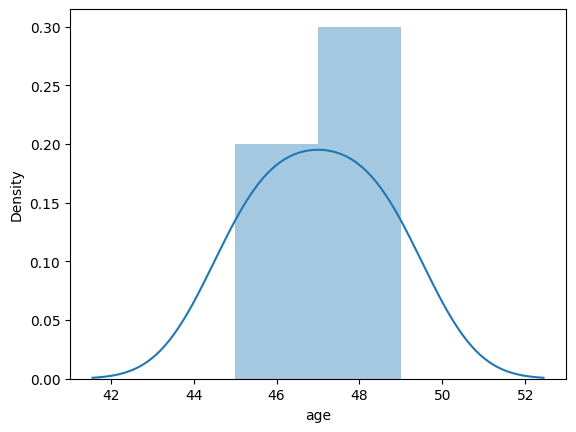

In [ ]:

sns.distplot(df['age'])

<Axes: ylabel='count'>

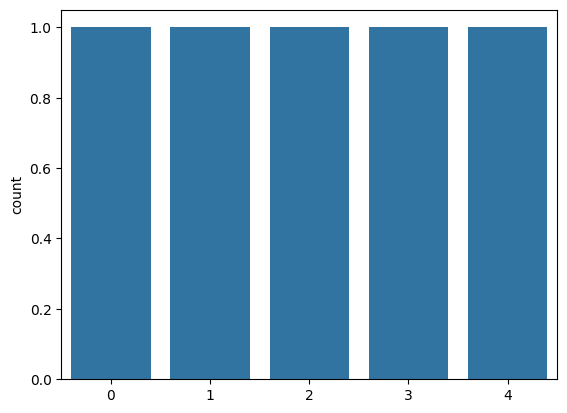

In [ ]:
sns.countplot(df['gender'])

In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

## Exploratory Data Analysis

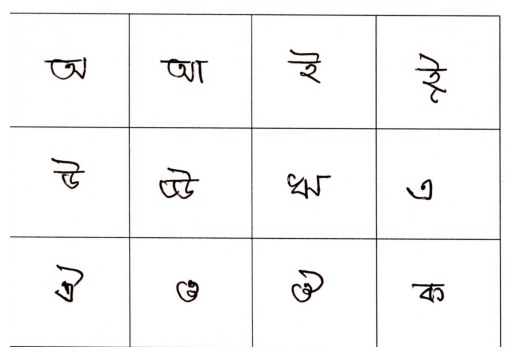

In [ ]:
img = load_img(df['image'][0])
plt.axis('off')
plt.imshow(img);



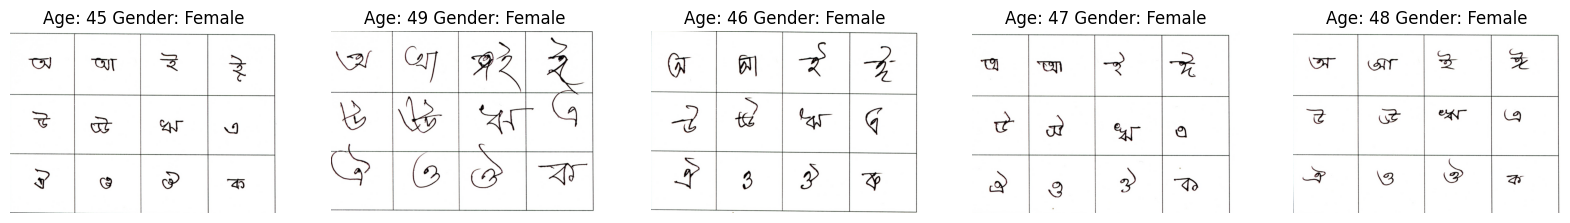

In [ ]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

# Feature Extration

In [ ]:

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale=True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features


In [ ]:
train_img = extract_features(df['image'])

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
<ipython-input-47-0e3cbaef4d40>:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128,128), Image.ANTIALIAS)


In [ ]:
train_img.shape

(5, 128, 128, 1)

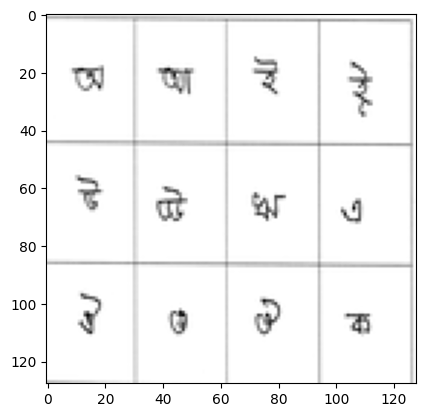

In [ ]:

plt.imshow(train_img[0],cmap='gray')

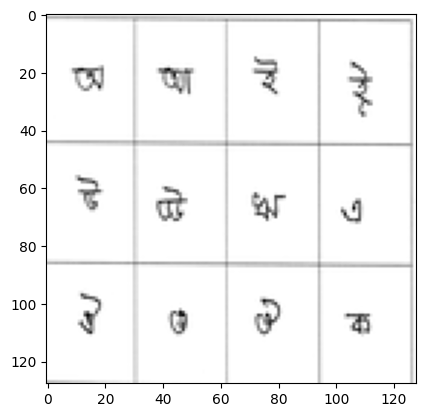

In [ ]:
import numpy as np
# Save the train_img array as npy file in Google Drive
np.save('/content/drive/My Drive/train_img.npy', train_img)
# Load the train_img array from npy file
train_img_loaded = np.load('/content/drive/My Drive/train_img.npy')

plt.imshow(train_img_loaded[0],cmap='gray')